# Covid-19 (Coronavirus) Analysis and Forecasting

*WORK IN PROGRESS*

Global Data Source: Johns Hopkins CSSE Data Repository - https://github.com/CSSEGISandData/COVID-19  
US States Data Source: Covid Tracking Project - https://covidtracking.com/data/  
US County Data Source: NY Times - https://github.com/nytimes/covid-19-data/

*Note that since 3/23 John Hopkins no longer tracks historic regional data including US States.  A separate dataset is required for US State data (Covid Tracking), and as such, there may be minor differences when comparing the combined individual state data (Covid Tracking Project dataset) against the Global US stats (John Hopkins dataset)*

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()

## Get the Datasets

### Dataset 1. Global (John Hopkins)

Live data is stored in files named MM-DD-YYYY.csv, so get the current date for live data updates.  
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

In [2]:
# Create the filename to load based on today's date

day = str(datetime.now().day) if datetime.now().day >= 10 else "0" + str(datetime.now().day)
month = str(datetime.now().month) if datetime.now().month >= 10 else "0" + str(datetime.now().month)
year = str(datetime.now().year)

jh_date = month + "-" + day + "-" + year
jh_date

'04-03-2020'

In [3]:
#  First try to pull today's data, but if it's not available yet, pull yesterday's data
try:
    fileURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + jh_date + ".csv"
    global_curr = pd.read_csv(fileURL)
except:
    day = str(datetime.now().day-1) if datetime.now().day-1 >= 10 else "0" + str(datetime.now().day-1)
    jh_date = month + "-" + day + "-" + year
    fileURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + jh_date + ".csv"
    global_curr = pd.read_csv(fileURL)
    
    jh_date

In [4]:
# Check out the first 5 rows to make sure the data loaded correctly
global_curr.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-03 22:46:37,34.223334,-82.461707,6,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-03 22:46:37,30.295065,-92.414197,72,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-03 22:46:37,37.767072,-75.632346,8,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-03 22:46:37,43.452658,-116.241552,307,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-03 22:46:37,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


**Also pull the global historic time series data.  Note that it won't have live data from today.**

In [5]:
global_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
global_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8


In [6]:
global_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

### Dataset 2. US States (Covid Tracking Project)

The Covid Tracking Project stores data in both API (JSON) and CSV formats.  We'll be loading the CSV files into Pandas here.  
https://covidtracking.com/api/  

States current - /api/states | [CSV](https://covidtracking.com/api/states.csv)  
States daily 4 pm ET - /api/states/daily | [CSV](http://covidtracking.com/api/states/daily.csv)  
States info - /api/states/info | [CSV](https://covidtracking.com/api/states/info.csv)  
US current - /api/us | [CSV](https://covidtracking.com/api/us.csv)  
US daily - /api/us/daily | [CSV](https://covidtracking.com/api/us/daily.csv)  
Counties- /api/counties | [CSV](https://covidtracking.com/api/counties.csv)  

In [7]:
states_curr = pd.read_csv('https://covidtracking.com/api/states.csv', index_col='state')

In [8]:
states_hist = pd.read_csv('http://covidtracking.com/api/states/daily.csv')

In [9]:
us_curr = pd.read_csv('https://covidtracking.com/api/us.csv')
us_curr

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,lastModified,death,hospitalized,total,totalTestResults,posNeg,notes
0,274316,1164139,62123,18998,36256,4686,594,70,689,10486,89a518cce5fb5934dde08ea79978600cd40c887e,2020-04-04T06:24:19.313Z,7040,36256,1500578,1438455,1438455,"NOTE: ""total"", ""posNeg"", ""hospitalized"" will b..."


In [10]:
us_hist = pd.read_csv('https://covidtracking.com/api/us/daily.csv')

### Dataset 3. US Counties - New York Times
https://github.com/nytimes/covid-19-data/

In [11]:
counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [12]:
counties.date = pd.to_datetime(counties.date)

In [13]:
nytdate = counties.date.max()
nytdate

Timestamp('2020-04-02 00:00:00')

In [14]:
counties.set_index('date', inplace=True)
counties.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0


## Data Wrangling

Get the data into a format where it's machine readable for analytics and forecasting

In [15]:
# Covid Tracking Project - US State data.  Look at first 5 rows before reformatting
states_hist.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200403,AK,157.0,5859.0,NaN,NaN,15.0,NaN,NaN,NaN,...,15.0,6016,6016,6016,2,0.0,6.0,980.0,14.0,994.0
1,20200403,AL,1432.0,8187.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9619,9619,9619,1,3.0,0.0,684.0,199.0,883.0
2,20200403,AR,704.0,8995.0,NaN,71.0,NaN,NaN,NaN,26.0,...,NaN,9699,9699,9699,5,0.0,0.0,1115.0,61.0,1176.0
3,20200403,AS,NaN,20.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,26,20,20,60,0.0,0.0,0.0,0.0,0.0
4,20200403,AZ,1769.0,22904.0,NaN,NaN,249.0,NaN,91.0,NaN,...,249.0,24673,24673,24673,4,9.0,21.0,1793.0,171.0,1964.0


In [16]:
# change YYYYMMDD to YYYY-MM-DD and convert to datetime

states_hist['date'] = states_hist['date'].apply(lambda x : str(x)[:4] + "-" + str(x)[4:6] + "-" + str(x)[6:8])
states_hist['date'] = states_hist['date'].apply(lambda x : pd.to_datetime(x) )

In [17]:
# Now set the date as the index

states_hist.set_index('date', inplace=True)
states_hist.sort_index(inplace=True)

In [18]:
states_hist.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-03-04,WI,1.0,19.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26,20,20,55,NaN,NaN,NaN,NaN,NaN
2020-03-04,AZ,2.0,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34,29,29,4,NaN,NaN,NaN,NaN,NaN
2020-03-04,CA,53.0,462.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,515,515,515,6,NaN,NaN,NaN,NaN,NaN
2020-03-04,FL,2.0,24.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42,26,26,12,NaN,NaN,NaN,NaN,NaN
2020-03-04,GA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,2,2,13,NaN,NaN,NaN,NaN,NaN


In [19]:
# get the latest date so we can pull recent data as needed
ctp_date = states_hist.index.max()
ctp_date

Timestamp('2020-04-03 00:00:00')

In [20]:
# get a list of the top 15 states using current data
top_states = states_curr['positive'].sort_values(ascending=False).nlargest(15).index
top_states

Index(['NY', 'NJ', 'MI', 'CA', 'MA', 'LA', 'FL', 'IL', 'PA', 'WA', 'GA', 'TX',
       'CT', 'CO', 'IN'],
      dtype='object', name='state')

In [21]:
# Now create a pivot tables for positive, negative, pending, hospitalized, death, total

states_positive = pd.pivot_table(states_hist, index='date', columns='state', values='positive')
states_negative = pd.pivot_table(states_hist, index='date', columns='state', values='negative')
states_pending = pd.pivot_table(states_hist, index='date', columns='state', values='pending')
states_hospitalized = pd.pivot_table(states_hist, index='date', columns='state', values='hospitalized')
states_deaths = pd.pivot_table(states_hist, index='date', columns='state', values='death')
states_tests = pd.pivot_table(states_hist, index='date', columns='state', values='total')

## Start examining the data - Exploratory Data Analysis (EDA)

In [22]:
# Total Global confirmed cases
global_curr['Confirmed'].sum()

1095917

In [23]:
# Total Global deaths
global_curr['Deaths'].sum()

58787

In [24]:
# Total US confirmed cases
global_curr[global_curr["Country_Region"]=='US']['Confirmed'].sum()

275586

In [25]:
# Total US Deaths (per JH dataset)
global_curr[global_curr["Country_Region"]=='US']['Deaths'].sum()

7087

In [26]:
# Make a Pivot Table to summarize the global confirmed cases by Country
date_columns = global_confirmed.iloc[:, 4:].columns
confirmed_country = pd.pivot_table(global_confirmed, index=['Country/Region'], values=date_columns, aggfunc=np.sum)
confirmed_country = confirmed_country.transpose()
confirmed_country.index = pd.to_datetime(confirmed_country.index)
confirmed_country = confirmed_country.sort_index()

In [27]:
# Top countries by confirmed count as of latest date
top_countries = confirmed_country.loc[jh_date].sort_values(ascending=False).nlargest(20)
top_countries

Country/Region
US                275586
Italy             119827
Spain             119199
Germany            91159
China              82511
France             65202
Iran               53183
United Kingdom     38689
Turkey             20921
Switzerland        19606
Belgium            16770
Netherlands        15821
Canada             12437
Austria            11524
Korea, South       10062
Portugal            9886
Brazil              9056
Israel              7428
Sweden              6131
Norway              5370
Name: 2020-04-03 00:00:00, dtype: int64

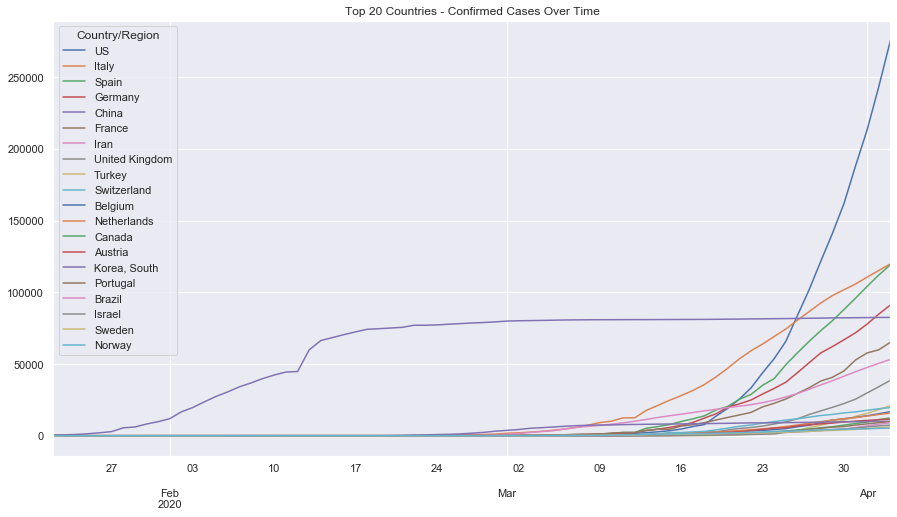

In [28]:
# Plot the top 20 countries confirmed infections over time
confirmed_country[top_countries.index].plot(figsize=(15,8), title="Top 20 Countries - Confirmed Cases Over Time")

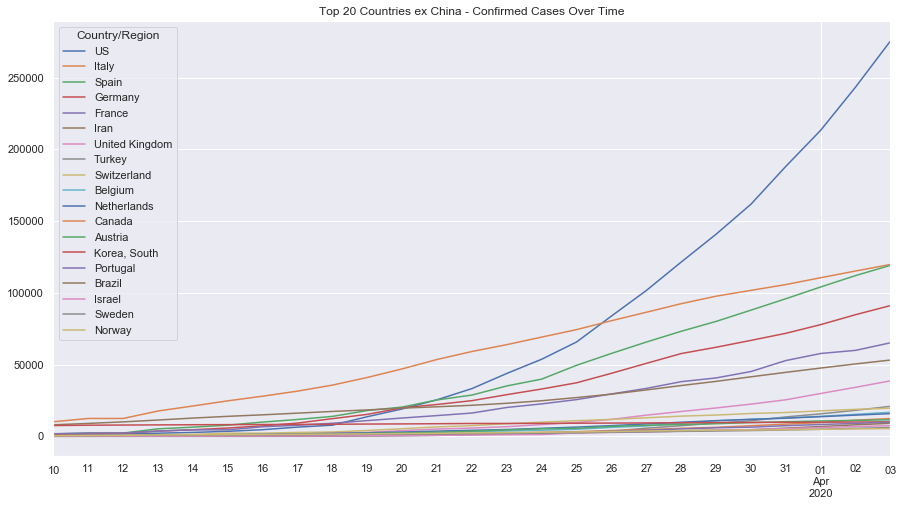

In [29]:
# Same chart but excluding China and starting on Mar 10 to zoom in
confirmed_country[top_countries.index].loc['03/10/2020':, top_countries.index != 'China'].plot(figsize=(15,8), title="Top 20 Countries ex China - Confirmed Cases Over Time")

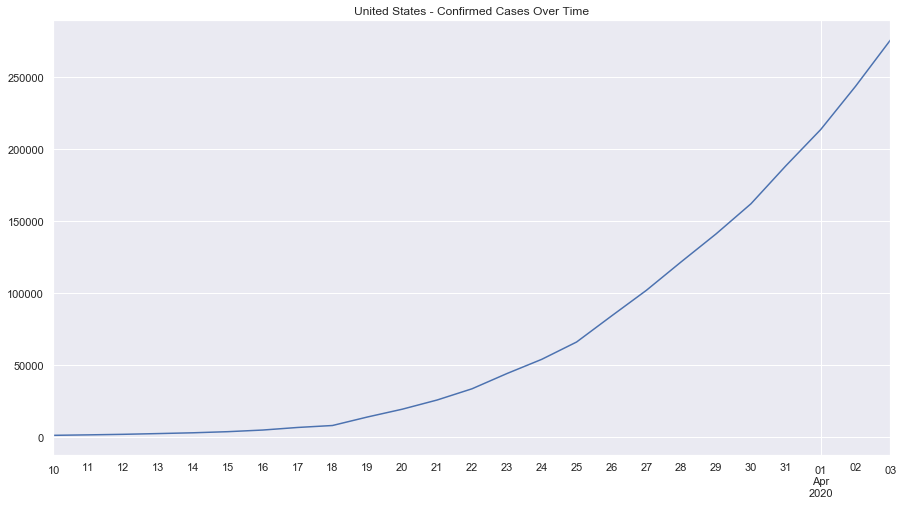

In [30]:
# Same chart but US only and starting on Mar 10 to zoom in
confirmed_country[top_countries.index].loc['3/10/2020':, 'US'].plot(figsize=(15,8), title="United States - Confirmed Cases Over Time")

In [31]:
# Top 5 New York counties with the most confirmed cases (JH Dataset)
global_curr[global_curr["Province_State"]=='New York'][['Admin2', 'Confirmed', 'Deaths']].sort_values(by='Confirmed', ascending=False).head(5)

,Admin2,Confirmed,Deaths
1521,New York City,57159,1584
2266,Westchester,12351,67
1503,Nassau,12024,95
1990,Suffolk,10154,84
1803,Rockland,4289,42


In [32]:
# Top 5 California counties with the most confirmed cases (JH Dataset)
global_curr[global_curr["Province_State"]=='California'][['Admin2', 'Confirmed', 'Deaths']].sort_values(by='Confirmed', ascending=False).head(5)

,Admin2,Confirmed,Deaths
1253,Los Angeles,4566,89
1852,Santa Clara,1019,36
1835,San Diego,966,16
1579,Orange,711,13
1836,San Francisco,497,7


In [33]:
# Top 5 Massachusetts counties with the most confirmed cases (JH Dataset)
global_curr[global_curr["Province_State"]=='Massachusetts'][['Admin2', 'Confirmed', 'Deaths']].sort_values(by='Confirmed', ascending=False).head(5)

,Admin2,Confirmed,Deaths
1408,Middlesex,2202,38
1989,Suffolk,2183,21
668,Essex,1238,23
1539,Norfolk,1045,24
2329,Worcester,825,14


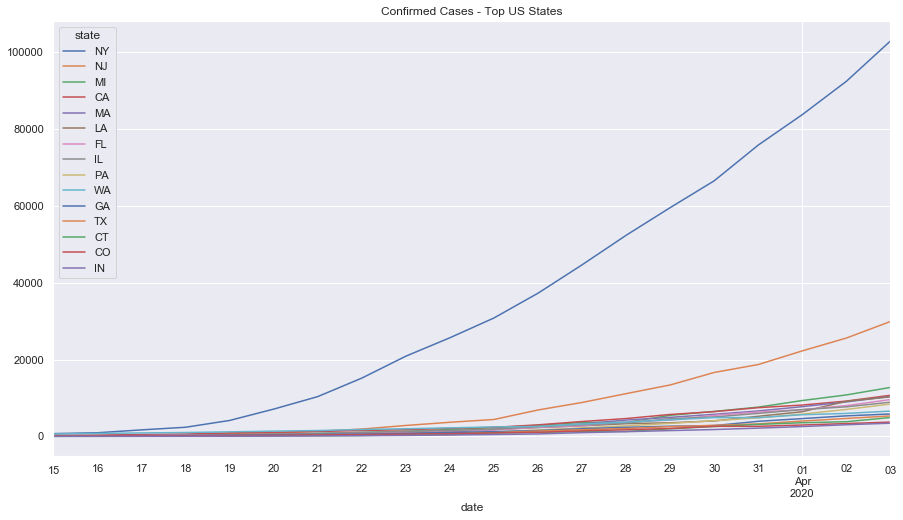

In [34]:
# Chart the top states with confirmed positive
states_positive[top_states].loc['3/15/2020':, :].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

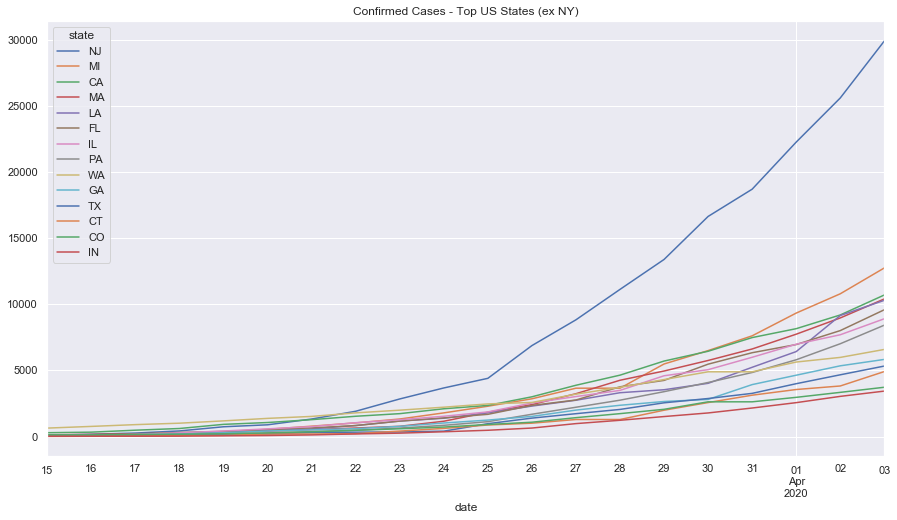

In [35]:
# The same chart but this time without NY to zoom in on the others
states_positive[top_states].loc['3/15/2020':, top_states != 'NY'].plot(title='Confirmed Cases - Top US States (ex NY)', figsize=(15,8))

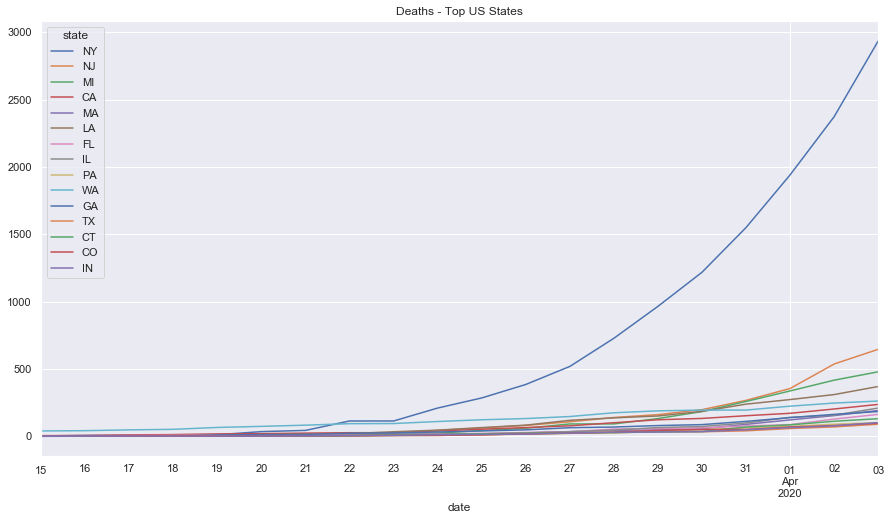

In [36]:
# Chart the top states of by # of deaths
states_deaths[top_states].loc['3/15/2020':, :].plot(title='Deaths - Top US States', figsize=(15,8))

In [37]:
counties_CA_filter = counties['state']=='California'
counties_CA_cases = pd.pivot_table(counties[counties_CA_filter], index='date', columns='county', values='cases', aggfunc=np.sum)

In [38]:
top_CA_counties = counties_CA_cases.loc[nytdate, :].nlargest(10).index
top_CA_counties

Index(['Los Angeles', 'San Diego', 'Santa Clara', 'Orange', 'Riverside',
       'San Mateo', 'San Francisco', 'Alameda', 'Sacramento',
       'San Bernardino'],
      dtype='object', name='county')

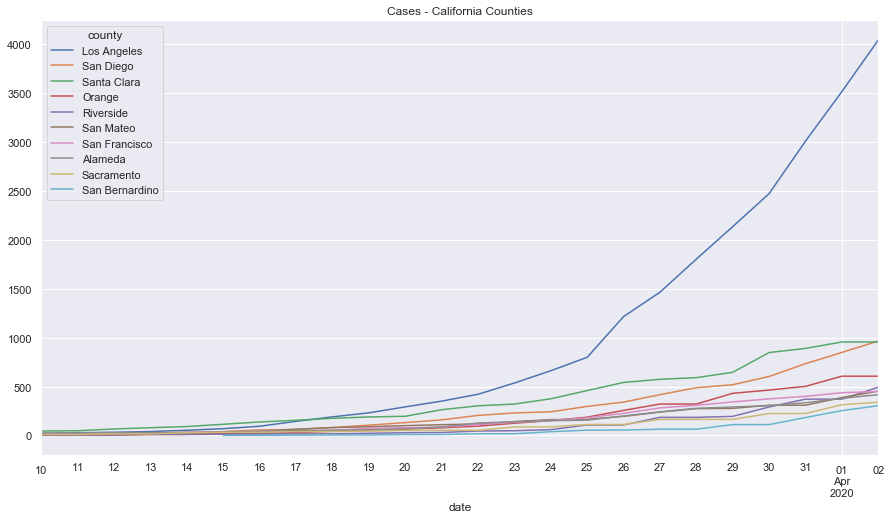

In [39]:
counties_CA_cases.loc['3/10/2020':, top_CA_counties].plot(title='Cases - California Counties', figsize=(15,8))

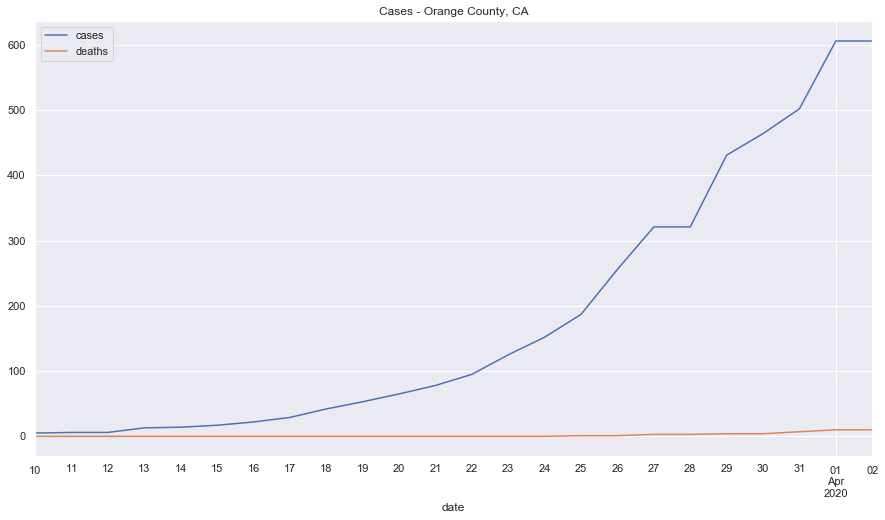

In [40]:
OC_filter = (counties['state']=='California') & (counties['county']=='Orange')
OC = counties[OC_filter]
OC.loc['03/10/2020':,'cases':].plot(title='Cases - Orange County, CA', figsize=(15,8))

In [41]:
counties_MA_filter = counties['state']=='Massachusetts'
counties_MA_cases = pd.pivot_table(counties[counties_MA_filter], index='date', columns='county', values='cases', aggfunc=np.sum)

In [42]:
top_MA_counties = counties_MA_cases.loc[nytdate, :].nlargest(10).index
top_MA_counties

Index(['Suffolk', 'Middlesex', 'Essex', 'Norfolk', 'Worcester', 'Plymouth',
       'Hampden', 'Bristol', 'Barnstable', 'Unknown'],
      dtype='object', name='county')

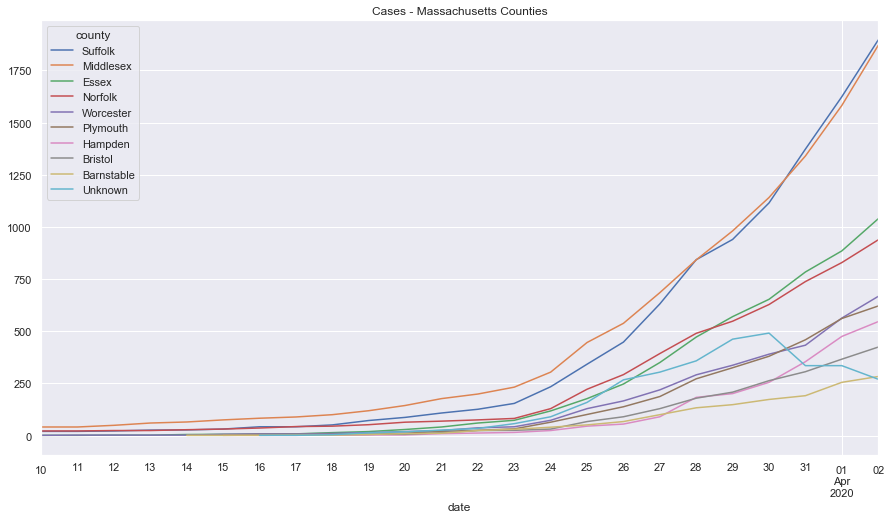

In [43]:
counties_MA_cases.loc['3/10/2020':, top_MA_counties].plot(title='Cases - Massachusetts Counties', figsize=(15,8))

**TODO NEXT:**  
- Move data wrangling to a separate data prep file
- Export data prep files to csv to be pulled into analysis notebook and for future reference
- More EDA and Data Viz
- Perform forecasting using the historic time series data
- Get population data for each country / state and add to this report (may be easiest to just put in a csv file)
  - Also population density if possible
- Add metrics based on poulation data (% of population infected, etc)
- Model out different scenarios: 
  - No changes
  - Lockdown
  - Extensive testing
  - Mandatory quarantines
  - Containment effectiveness score for each country (estimated)
  - Cure discovered
- Look into using Unity to model out scenarios, using simulated humans and the Global / US map tool I have